**LAB-4**

**A1. Confusion Matrix, Precision, Recall, F1-score (Train &  Test)**

In [3]:
# A1: Evaluate Confusion Matrix and Classification Report for Train & Test sets

# Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the Dataset
def load_fluency_data1(csv_file_path):
    dataset12 = pd.read_csv(csv_file_path)  # Load the dataset
    feature_columns12 = dataset12.select_dtypes(include=[np.number]).columns[:-1].tolist()  # All numeric except last
    target_column12 = dataset12.columns[-1]  # Assume last column is the label
    return dataset12, feature_columns12, target_column12

# Step 2: Train the kNN Classifier
def train_knn_model1(data, features, target, k_neighbors=3):
    X = data[features].values  # Feature matrix
    y = data[target].values    # Target labels

    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train kNN model
    knn_model12 = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn_model12.fit(X_train, y_train)

    return knn_model12, X_train, X_test, y_train, y_test

# Step 3: Generate Confusion Matrix and Classification Report
def evaluate_knn_model12(knn_model, X_train, y_train, X_test, y_test):
    # Predictions
    y_train_pred12 = knn_model.predict(X_train)
    y_test_pred12 = knn_model.predict(X_test)

    # Confusion matrices
    cm_train12 = confusion_matrix(y_train, y_train_pred12)
    cm_test12 = confusion_matrix(y_test, y_test_pred12)

    # Classification reports
    report_train12 = classification_report(y_train, y_train_pred12, output_dict=True)
    report_test12 = classification_report(y_test, y_test_pred12, output_dict=True)

    return cm_train12, cm_test12, report_train12, report_test12

# Step 4: Load dataset and run everything
fluency_data12, fluency_features12, fluency_label12 = load_fluency_data1("processed_fluency_dataset.csv")

# Train the kNN model (k = 3)
knn_model, X_train, X_test, y_train, y_test = train_knn_model1(fluency_data12, fluency_features12, fluency_label12, k_neighbors=3)

# Evaluate the model
conf_matrix_train12, conf_matrix_test12, report_train12, report_test12 = evaluate_knn_model12(knn_model, X_train, y_train, X_test, y_test)

# Step 5: Print results (outside function)
print("Train Confusion Matrix:\n", conf_matrix_train12)
print("Test Confusion Matrix:\n", conf_matrix_test12)
print("Train Classification Report:\n", pd.DataFrame(report_train12).T)
print("Test Classification Report:\n", pd.DataFrame(report_test12).T)

Train Confusion Matrix:
 [[518   1 170]
 [ 29   5  12]
 [175   1 929]]
Test Confusion Matrix:
 [[142   3 132]
 [ 13   2  14]
 [138   2 343]]
Train Classification Report:
               precision    recall  f1-score     support
0              0.717452  0.751814  0.734231   689.00000
1              0.714286  0.108696  0.188679    46.00000
2              0.836184  0.840724  0.838448  1105.00000
accuracy       0.789130  0.789130  0.789130     0.78913
macro avg      0.755974  0.567078  0.587119  1840.00000
weighted avg   0.788676  0.789130  0.783179  1840.00000
Test Classification Report:
               precision    recall  f1-score     support
0              0.484642  0.512635  0.498246  277.000000
1              0.285714  0.068966  0.111111   29.000000
2              0.701431  0.710145  0.705761  483.000000
accuracy       0.617237  0.617237  0.617237    0.617237
macro avg      0.490596  0.430582  0.438373  789.000000
weighted avg   0.610042  0.617237  0.611051  789.000000


**A2. Price Prediction using Regression Metrics (MSE, RMSE, MAPE, R²)**

**Displaing columns**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("IRCTC_Stock_Price.csv")

# Display all column names
print("Available Columns in Dataset:")
print(df.columns.tolist())

Available Columns in Dataset:
['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%']


**A2. MSE, RMSE, MAPE, R²**

Regression Evaluation Metrics (on Test Set):
MSE: 164.1921
RMSE: 12.8137
MAPE: 0.0051
R2 Score: 0.9973


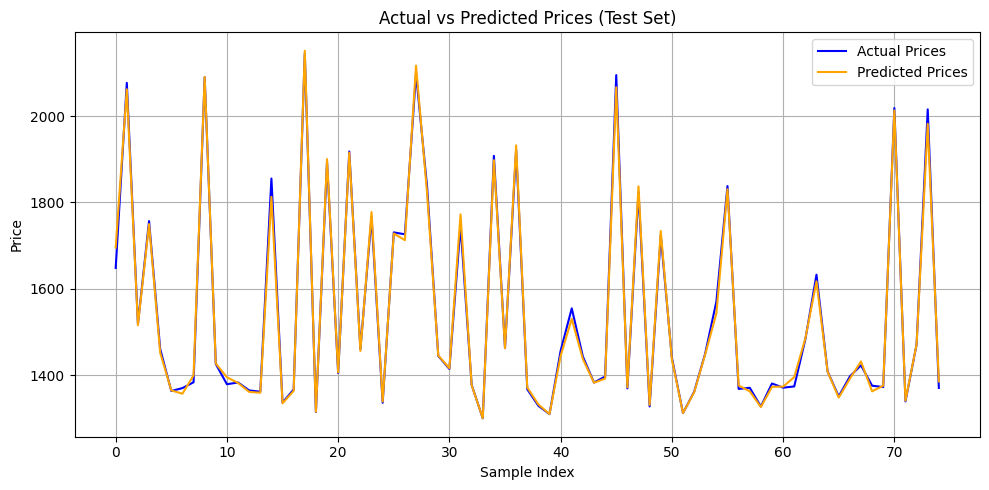

In [4]:
# A2: Evaluate Regression Metrics for Stock Price Prediction using Linear Regression

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Convert 'Volume' strings like '1.91M' into numeric values
def convert_volume_column1(dataframe1, column_name='Volume'):
    def convert1(value):
        value = str(value).strip()
        if value.endswith('K'):
            return float(value[:-1]) * 1e3
        elif value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
        else:
            return float(value)
    dataframe1[column_name] = dataframe1[column_name].apply(convert1)
    return dataframe1

# Step 2: Load and clean IRCTC stock dataset
def load_irctc_data12(csv_path):
    stock_data12 = pd.read_csv(csv_path)
    stock_data12 = convert_volume_column1(stock_data12, 'Volume')   # Clean Volume
    stock_data12 = stock_data12.dropna()  # Drop rows with missing values

    # Select input features and output target
    input_features12 = stock_data12[['Open', 'High', 'Low', 'Volume']].values
    target_prices12 = stock_data12['Price'].values
    return stock_data12, input_features12, target_prices12

# Step 3: Split data into training and testing sets
def split_stock_data12(X, y, test_ratio=0.3):
    return train_test_split(X, y, test_size=test_ratio, random_state=42)

# Step 4: Train Linear Regression Model
def train_linear_regression12(X_train, y_train):
    linear_model12 = LinearRegression()
    linear_model12.fit(X_train, y_train)
    return linear_model12

# Step 5: Compute Regression Metrics
def calculate_regression_metrics12(model, X_test, y_test):
    predicted_prices12 = model.predict(X_test)

    mse = mean_squared_error(y_test, predicted_prices12)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, predicted_prices12)
    r2 = r2_score(y_test, predicted_prices12)

    metrics_dict1 = {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2 Score': r2
    }

    return metrics_dict1, predicted_prices12

# Step 6: Execute the regression pipeline
# Load data
stock_df, features_matrix, target_vector = load_irctc_data12("IRCTC_Stock_Price.csv")

# Split data into training and testing
X_train, X_test, y_train, y_test = split_stock_data12(features_matrix, target_vector)

# Train the regression model
lr_model = train_linear_regression12(X_train, y_train)

# Evaluate and get predictions
regression_results, predicted_values = calculate_regression_metrics12(lr_model, X_test, y_test)

# Step 7: Print Results
print("Regression Evaluation Metrics (on Test Set):")
for metric, val in regression_results.items():
    print(f"{metric}: {val:.4f}")

# Step 8: Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predicted_values, label='Predicted Prices', color='orange')
plt.title("Actual vs Predicted Prices (Test Set)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**A3. Generate 20 Training Points (X, Y, Class 0 or 1)**

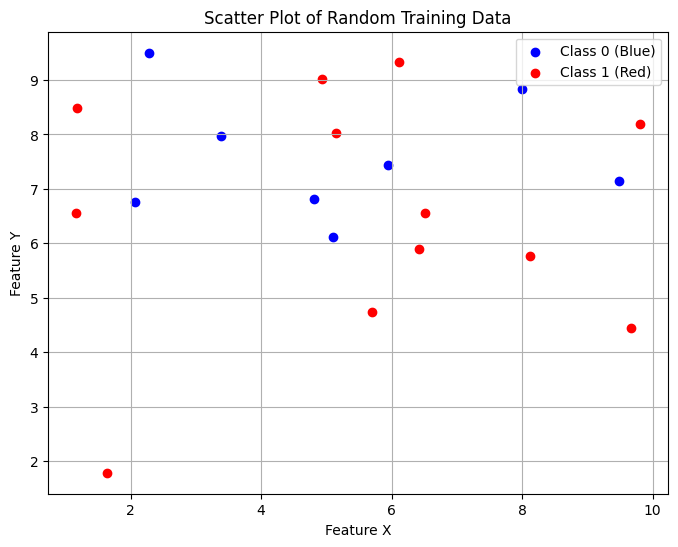

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 20 random 2D data points (features)
np.random.seed(0)  # Set seed for reproducibility
training_points1 = np.random.uniform(1, 10, size=(20, 2))  # 20 points with 2 features: X and Y

# Step 2: Assign class labels randomly (0 = Blue, 1 = Red)
class_labels1 = np.random.randint(0, 2, size=20)

# Step 3: Separate the points by class for visualization
points_class_02 = training_points1[class_labels1 == 0]
points_class_12 = training_points1[class_labels1 == 1]

# Step 4: Plot the points with different colors by class
plt.figure(figsize=(8, 6))
plt.scatter(points_class_02[:, 0], points_class_02[:, 1], color='blue', label='Class 0 (Blue)')
plt.scatter(points_class_12[:, 0], points_class_12[:, 1], color='red', label='Class 1 (Red)')
plt.title("Scatter Plot of Random Training Data")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.grid(True)
plt.show()

**A4. Classify Grid of Test Points Using kNN and Visualize**

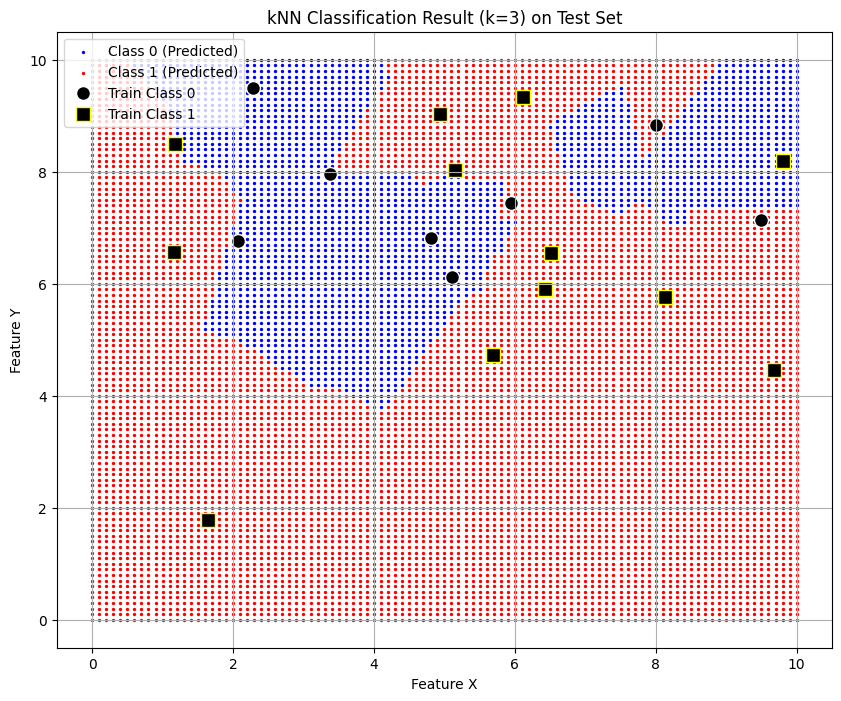

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step A3: Generate training data
np.random.seed(0)
training_features12 = np.random.uniform(1, 10, size=(20, 2))   # 20 samples with 2 features
training_labels12 = np.random.randint(0, 2, size=20)           # Labels: 0 (Blue), 1 (Red)

# Step A4: Generate test grid data (100 x 100 = 10,000 points)
x_range = np.arange(0, 10.1, 0.1)
y_range = np.arange(0, 10.1, 0.1)
test_grid_points12 = np.array([[x, y] for x in x_range for y in y_range])

# Step A4: Train the kNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(training_features12, training_labels12)

# Predict labels for the test grid
predicted_labels = knn_model.predict(test_grid_points12)

# Step A4: Plot classification results
plt.figure(figsize=(10, 8))
plt.scatter(test_grid_points12[predicted_labels == 0][:, 0], test_grid_points12[predicted_labels == 0][:, 1], color='blue', s=2, label='Class 0 (Predicted)')
plt.scatter(test_grid_points12[predicted_labels == 1][:, 0], test_grid_points12[predicted_labels == 1][:, 1], color='red', s=2, label='Class 1 (Predicted)')

# Overlay training samples
plt.scatter(training_features12[training_labels12 == 0][:, 0], training_features12[training_labels12 == 0][:, 1], color='black', edgecolors='white', s=100, marker='o', label='Train Class 0')
plt.scatter(training_features12[training_labels12 == 1][:, 0], training_features12[training_labels12 == 1][:, 1], color='black', edgecolors='yellow', s=100, marker='s', label='Train Class 1')

plt.title("kNN Classification Result (k=3) on Test Set")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.grid(True)
plt.show()

**A5. Repeat A4 for Various k values**

**k=2**

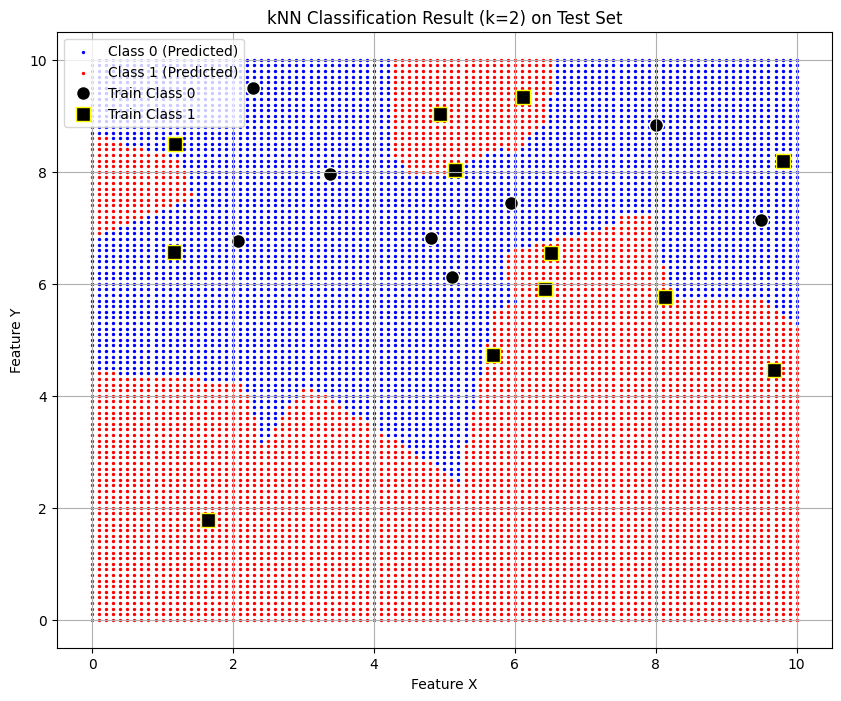

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step A3: Generate random training data
np.random.seed(0)
training_data12 = np.random.uniform(1, 10, size=(20, 2))    # 20 training samples with 2 features
training_labels12 = np.random.randint(0, 2, size=20)        # Labels: 0 (Blue), 1 (Red)

# Step A4: Create test data grid (100 x 100 = 10,000 points)
x_grid_vals = np.arange(0, 10.1, 0.1)
y_grid_vals = np.arange(0, 10.1, 0.1)
test_grid_data12 = np.array([[x, y] for x in x_grid_vals for y in y_grid_vals])

# Step A4: Fit kNN classifier with k=2
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(training_data12, training_labels12)

# Predict class labels for the test grid
predicted_labels12 = knn_classifier.predict(test_grid_data12)

# Step A4: Plot the classification result
plt.figure(figsize=(10, 8))
plt.scatter(test_grid_data12[predicted_labels12 == 0][:, 0], test_grid_data12[predicted_labels12 == 0][:, 1], color='blue', s=2, label='Class 0 (Predicted)')
plt.scatter(test_grid_data12[predicted_labels12 == 1][:, 0], test_grid_data12[predicted_labels12 == 1][:, 1], color='red', s=2, label='Class 1 (Predicted)')

# Overlay the original training points
plt.scatter(training_data12[training_labels12 == 0][:, 0], training_data12[training_labels12 == 0][:, 1], color='black', edgecolors='white', s=100, marker='o', label='Train Class 0')
plt.scatter(training_data12[training_labels12 == 1][:, 0], training_data12[training_labels12 == 1][:, 1], color='black', edgecolors='yellow', s=100, marker='s', label='Train Class 1')

plt.title("kNN Classification Result (k=2) on Test Set")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.grid(True)
plt.show()

**k=4**

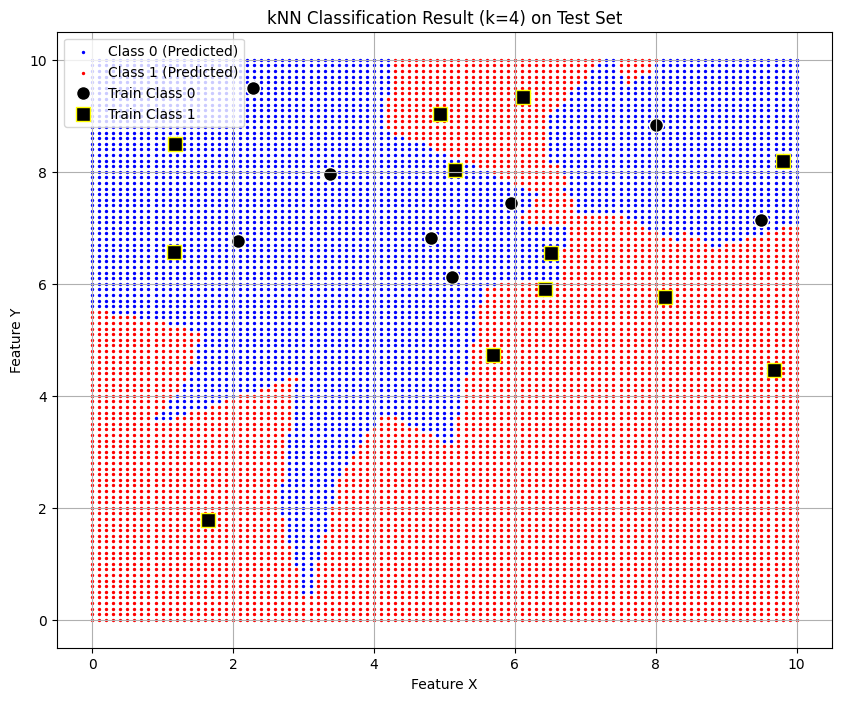

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step A3: Generate training data
np.random.seed(0)
train_features12 = np.random.uniform(1, 10, size=(20, 2))   # 20 training samples with 2 features
train_labels12 = np.random.randint(0, 2, size=20)           # Labels: 0 (Blue), 1 (Red)

# Step A4: Generate test grid data (100 x 100 = 10,000 points)
grid_x_values = np.arange(0, 10.1, 0.1)
grid_y_values = np.arange(0, 10.1, 0.1)
test_grid_features12 = np.array([[x, y] for x in grid_x_values for y in grid_y_values])

# Step A4: Train kNN classifier with k=4
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(train_features12, train_labels12)

# Predict labels for test grid
grid_predictions1 = knn_model.predict(test_grid_features12)

# Step A4: Visualize predictions
plt.figure(figsize=(10, 8))
plt.scatter(test_grid_features12[grid_predictions1 == 0][:, 0], test_grid_features12[grid_predictions1 == 0][:, 1], color='blue', s=2, label='Class 0 (Predicted)')
plt.scatter(test_grid_features12[grid_predictions1 == 1][:, 0], test_grid_features12[grid_predictions1 == 1][:, 1], color='red', s=2, label='Class 1 (Predicted)')

# Overlay training data
plt.scatter(train_features12[train_labels12 == 0][:, 0], train_features12[train_labels12 == 0][:, 1], color='black', edgecolors='white', s=100, marker='o', label='Train Class 0')
plt.scatter(train_features12[train_labels12 == 1][:, 0], train_features12[train_labels12 == 1][:, 1], color='black', edgecolors='yellow', s=100, marker='s', label='Train Class 1')

plt.title("kNN Classification Result (k=4) on Test Set")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.grid(True)
plt.show()

**k=5**

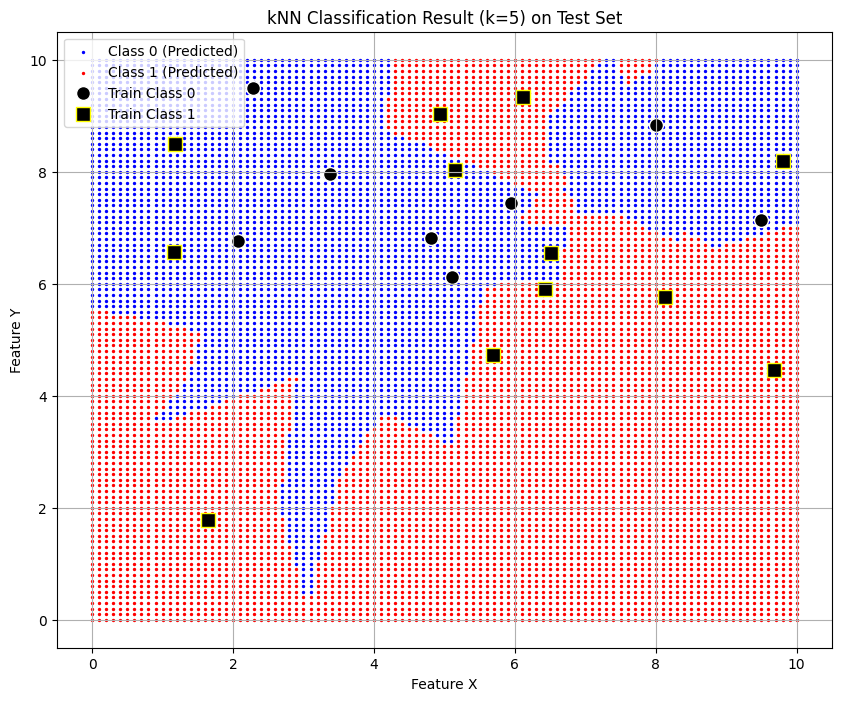

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step A3: Training data
np.random.seed(0)
train_features12 = np.random.uniform(1, 10, size=(20, 2))   # 20 training samples
train_labels12 = np.random.randint(0, 2, size=20)           # Labels: 0 (Blue), 1 (Red)

# Step A4: Generate test data grid (100 x 100 = 10,000 points)
grid_x_values = np.arange(0, 10.1, 0.1)
grid_y_values = np.arange(0, 10.1, 0.1)
test_grid_features12 = np.array([[x, y] for x in grid_x_values for y in grid_y_values])

# Step A4: Fit kNN classifier
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(train_features12, train_labels12)

# Predict labels for test set
grid_predictions12 = knn_model.predict(test_grid_features12)

# Step A4: Plot test predictions
plt.figure(figsize=(10, 8))
plt.scatter(test_grid_features12[grid_predictions12 == 0][:, 0], test_grid_features12[grid_predictions1 == 0][:, 1], color='blue', s=2, label='Class 0 (Predicted)')
plt.scatter(test_grid_features12[grid_predictions1 == 1][:, 0], test_grid_features12[grid_predictions1 == 1][:, 1], color='red', s=2, label='Class 1 (Predicted)')

# Overlay training points
plt.scatter(train_features12[train_labels12 == 0][:, 0], train_features12[train_labels12 == 0][:, 1], color='black', edgecolors='white', s=100, marker='o', label='Train Class 0')
plt.scatter(train_features12[train_labels12 == 1][:, 0], train_features12[train_labels12 == 1][:, 1], color='black', edgecolors='yellow', s=100, marker='s', label='Train Class 1')

plt.title("kNN Classification Result (k=5) on Test Set")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.grid(True)
plt.show()

**A6. Repeat A3–A5 for Project Data (Two Features Only)**

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("processed_fluency_dataset.csv")

# Print unique class labels in the 'fluency' column
print(df['fluency'].unique())

['Average' 'Poor' 'Fluent']


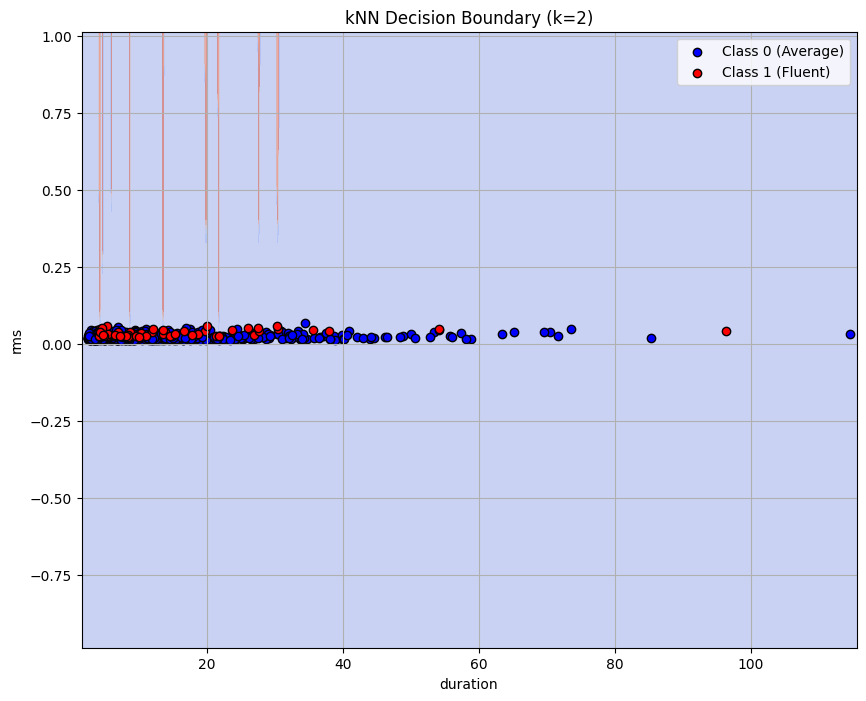

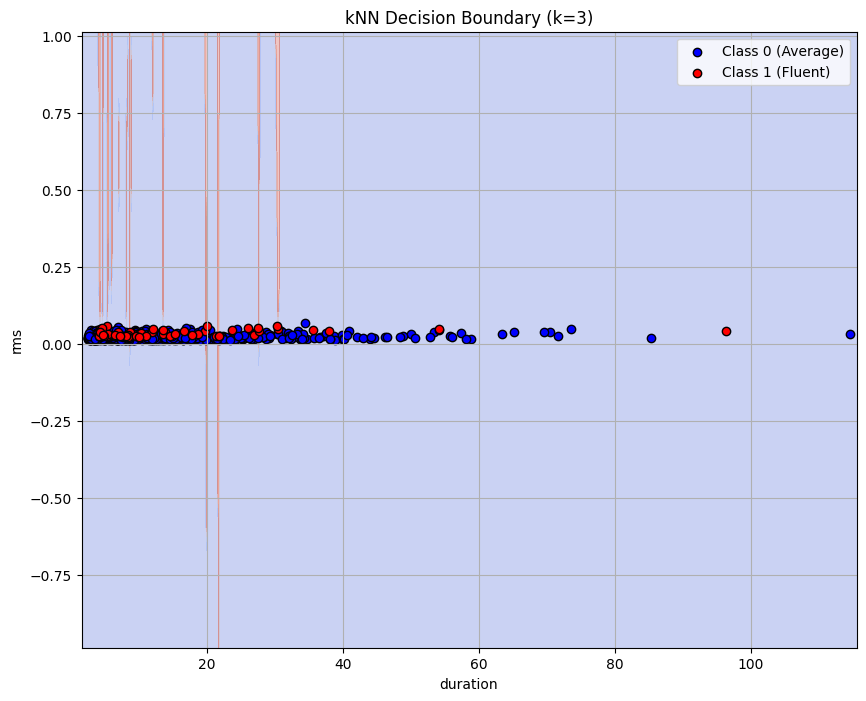

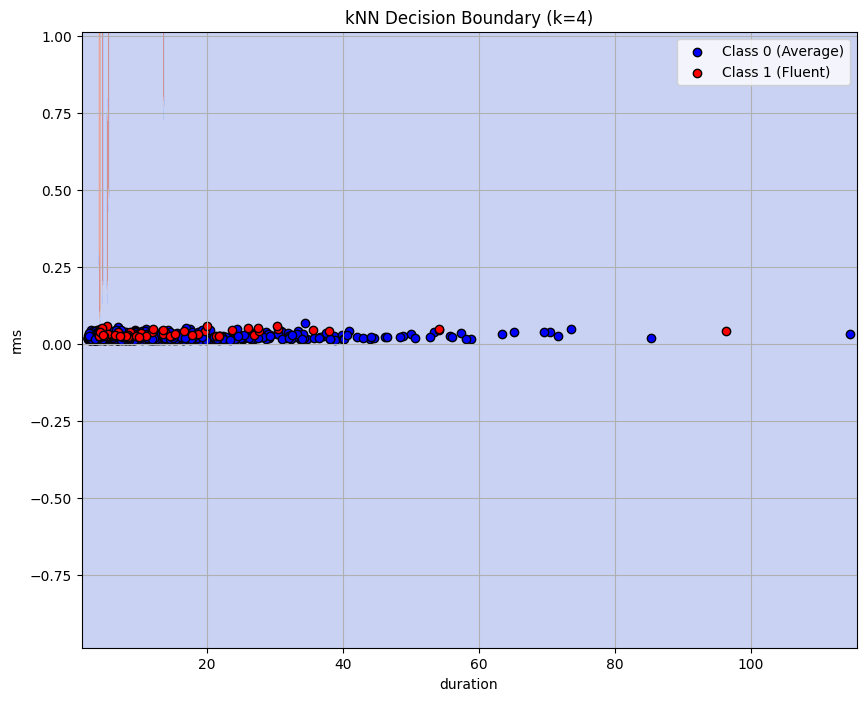

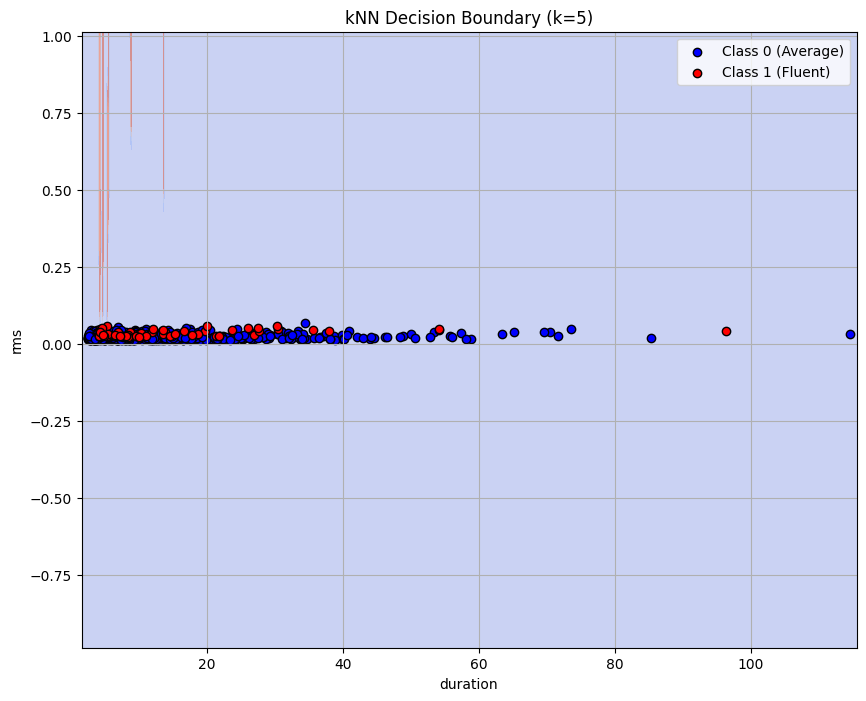

In [13]:
# A6: Project Dataset Boundary Visualization using kNN Classifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load and filter project dataset for two selected classes and two features
fluency_df12 = pd.read_csv("processed_fluency_dataset.csv")  # Load dataset

# Select any two classes (e.g., 'Average' and 'Fluent') for binary classification
chosen_classes12 = ['Average', 'Fluent']
filtered_df12 = fluency_df12[fluency_df12['fluency'].isin(chosen_classes12)].copy()  # Filter and copy to avoid SettingWithCopyWarning

# Encode class labels to 0 and 1 for simplicity
filtered_df12['fluency'] = filtered_df12['fluency'].map({'Average': 0, 'Fluent': 1})

# Select any two numerical features for 2D visualization (first two numeric columns)
selected_features12 = filtered_df12.select_dtypes(include=[np.number]).columns[:2].tolist()

# Extract feature values and labels
features_matrix12 = filtered_df12[selected_features12].values  # Feature matrix
class_labels12 = filtered_df12['fluency'].values             # Class labels

# Step 2: Generate test grid across the feature space (for 2D prediction surface)
x_range_min, x_range_max = features_matrix12[:, 0].min() - 1, features_matrix12[:, 0].max() + 1
y_range_min, y_range_max = features_matrix12[:, 1].min() - 1, features_matrix12[:, 1].max() + 1

xx_grid, yy_grid = np.meshgrid(np.arange(x_range_min, x_range_max, 0.1),
                               np.arange(y_range_min, y_range_max, 0.1))

test_grid_input12 = np.c_[xx_grid.ravel(), yy_grid.ravel()]

# Step 3: Define function to train and plot kNN decision boundaries
def plot_knn_decision_boundary1(features_matrix1, class_labels12, test_grid_input1, xx_grid, yy_grid, k=3):
    # FIXED: Use features_matrix1 instead of undefined features_matrix
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(features_matrix12, class_labels12)

    predicted_grid_labels12 = knn_model.predict(test_grid_input1)
    decision_surface12 = predicted_grid_labels12.reshape(xx_grid.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx_grid, yy_grid, decision_surface12, cmap=plt.cm.coolwarm, alpha=0.3)

    plt.scatter(features_matrix12[class_labels12 == 0][:, 0], features_matrix12[class_labels12 == 0][:, 1],
                c='blue', edgecolor='k', label='Class 0 (Average)')
    plt.scatter(features_matrix12[class_labels12 == 1][:, 0], features_matrix12[class_labels12 == 1][:, 1],
                c='red', edgecolor='k', label='Class 1 (Fluent)')

    plt.title(f"kNN Decision Boundary (k={k})")
    plt.xlabel(selected_features12[0])
    plt.ylabel(selected_features12[1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 4: Plot decision boundaries for multiple values of k
plot_knn_decision_boundary1(features_matrix12, class_labels12, test_grid_input12, xx_grid, yy_grid, k=2)
plot_knn_decision_boundary1(features_matrix12, class_labels12, test_grid_input12, xx_grid, yy_grid, k=3)
plot_knn_decision_boundary1(features_matrix12, class_labels12, test_grid_input12, xx_grid, yy_grid, k=4)
plot_knn_decision_boundary1(features_matrix12, class_labels12, test_grid_input12, xx_grid, yy_grid, k=5)

**A7. Hyperparameter Tuning using GridSearchCV() and  RandomSearchCV()**

In [14]:
# A7: Hyperparameter Tuning with GridSearchCV on Project Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Step 1: Load and prepare the dataset
fluency_data12 = pd.read_csv("processed_fluency_dataset.csv")

# Filter for two selected classes for binary classification
fluency_data12 = fluency_data12[fluency_data12['fluency'].isin(['Average', 'Fluent'])].copy()

# Encode class labels: 'Average' → 0, 'Fluent' → 1
fluency_data12['fluency'] = fluency_data12['fluency'].map({'Average': 0, 'Fluent': 1})

# Select first two numeric features for simplicity
selected_features1 = fluency_data12.select_dtypes(include=[np.number]).columns[:2].tolist()

# Define features and labels
X_features = fluency_data12[selected_features1].values
y_labels = fluency_data12['fluency'].values

# Step 2: Split into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_features, y_labels, test_size=0.3, random_state=42)

# Step 3: Grid search to find best k in kNN
knn_param_grid = {'n_neighbors': list(range(1, 16))}  # try k = 1 to 15
knn_model = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation
grid_search_knn = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_set, y_train_set)

# Step 4: Best model selection
optimal_k = grid_search_knn.best_params_['n_neighbors']
best_knn_model = grid_search_knn.best_estimator_

# Step 5: Predict on test data
predicted_labels = best_knn_model.predict(X_test_set)

# Step 6: Print the results
print(f"Best k value found: {optimal_k}")
print("\nClassification Report with Best k:")
print(classification_report(y_test_set, predicted_labels, zero_division=0))  # suppress undefined metric warning

Best k value found: 2

Classification Report with Best k:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       284
           1       0.00      0.00      0.00        29

    accuracy                           0.91       313
   macro avg       0.45      0.50      0.48       313
weighted avg       0.82      0.91      0.86       313

